In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 3/32: Loading packages  ####
import pickle
from pathlib import Path

import pandas as pd
import numpy as np

In [3]:
#=================================================-
#### Slide 4/32: Directory settings  ####

# Set 'main_dir' to location of the project folder
curr_dir = Path.cwd()
main_dir = Path.cwd().parent
data_dir = main_dir / "data"
plot_dir = main_dir / "plots"

In [4]:
data_dir = Path.cwd().parent / "data"

In [5]:
#=================================================-
#### Slide 5/32: Importing matplotlib  ####

import matplotlib.pyplot as plt

In [6]:
#=================================================-
#### Slide 6/32: Dataset for visualization  ####

# This dataset is of type dataframe. Let's assign this dataset to a variable, so that we can manipulate it freely.
df = pd.read_csv(data_dir / "diabetes.csv")
print(type(df))  #<- a Pandas DataFrame!
print(len(df))   #<- returns the number of rows

<class 'pandas.core.frame.DataFrame'>
768


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,id
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5


In [8]:
#=================================================-
#### Slide 7/32: Subsetting data  ####

df_subset = df[[
    'BMI',
    'SkinThickness',
    'BloodPressure',
    'Age',
    'Glucose',
    'Insulin',
    'DiabetesPedigreeFunction',
    'Outcome',
    'Pregnancies',
]]
df_subset.head()

,BMI,SkinThickness,BloodPressure,Age,Glucose,Insulin,DiabetesPedigreeFunction,Outcome,Pregnancies
0,33.6,35,72,50,148,0,0.627,1,6
1,26.6,29,66,31,85,0,0.351,0,1
2,23.3,0,64,32,183,0,0.672,1,8
3,28.1,23,66,21,89,94,0.167,0,1
4,43.1,35,40,33,137,168,2.288,1,0


In [9]:
#=================================================-
#### Slide 11/32: Prepare data: group and summarize (cont'd)  ####

col_dict = df_subset.nunique().to_dict()
grouping_col = min(col_dict, key=col_dict.get)
# Group data by variable with min levels.
grouped = df_subset.groupby(grouping_col)
# Compute mean on the listed variables using the grouped data.
df_grouped_mean = grouped[[
    'BMI',
    'SkinThickness',
    'BloodPressure',
    'Age',
    'Glucose',
    'Insulin',
    'DiabetesPedigreeFunction',
]].mean()
df_grouped_mean

,BMI,SkinThickness,BloodPressure,Age,Glucose,Insulin,DiabetesPedigreeFunction
Outcome,,,,,,,
0,30.304200,19.664000,68.184000,31.190000,109.980000,68.792000,0.429734
1,35.142537,22.164179,70.824627,37.067164,141.257463,100.335821,0.550500


In [10]:
#=================================================-
#### Slide 12/32: Prepare data: group and summarize (cont'd)  ####

# Reset index of the dataset.
df_grouped_mean = df_grouped_mean.reset_index()
df_grouped_mean


,Outcome,BMI,SkinThickness,BloodPressure,Age,Glucose,Insulin,DiabetesPedigreeFunction
0,0,30.304200,19.664000,68.184000,31.190000,109.980000,68.792000,0.429734
1,1,35.142537,22.164179,70.824627,37.067164,141.257463,100.335821,0.550500


In [11]:
#=================================================-
#### Slide 15/32: Wide to long format: melt (cont'd)  ####

# Melt the wide data into long.
df_grouped_mean_long = df_grouped_mean.melt(
    id_vars=grouping_col,
    var_name='metric',
    value_name='mean',
)
df_grouped_mean_long

,Outcome,metric,mean
0,0,BMI,30.304200
1,1,BMI,35.142537
2,0,SkinThickness,19.664000
3,1,SkinThickness,22.164179
4,0,BloodPressure,68.184000
5,1,BloodPressure,70.824627
6,0,Age,31.190000
7,1,Age,37.067164
8,0,Glucose,109.980000
9,1,Glucose,141.257463


In [12]:
%who_ls

['Path',
 'col_dict',
 'curr_dir',
 'data_dir',
 'df',
 'df_grouped_mean',
 'df_grouped_mean_long',
 'df_subset',
 'grouped',
 'grouping_col',
 'main_dir',
 'np',
 'pd',
 'pickle',
 'plot_dir',
 'plt']

In [13]:
data_dir / "data"

PosixPath('/Users/maptv/maptv/Data-Visualization-with-Python/data/data')

In [14]:
#=================================================-
#### Slide 17/32: Long to wide format: pivot (cont'd)

# Melt the long data into wide.
df_grouped_mean_wide = df_grouped_mean_long.pivot(
    index=[grouping_col],
    columns='metric',
    values='mean',
)
df_grouped_mean_wide

metric,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,SkinThickness
Outcome,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,22.164179


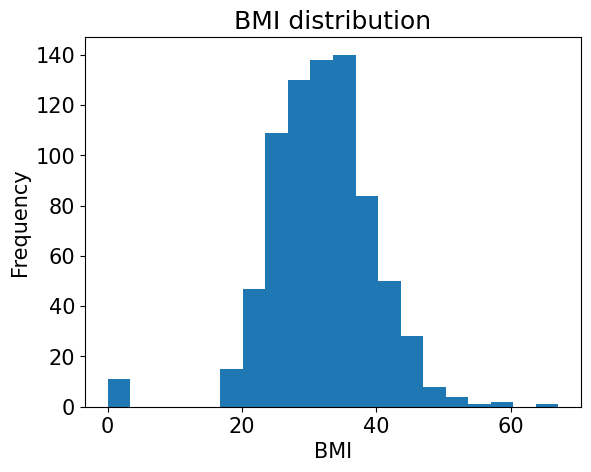

In [15]:
#=================================================-
#### Slide 20/32: Univariate plots: histogram  ####

plt.rcParams.update({'font.size': 15})
df_subset['BMI'].hist(grid=False, bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI distribution');

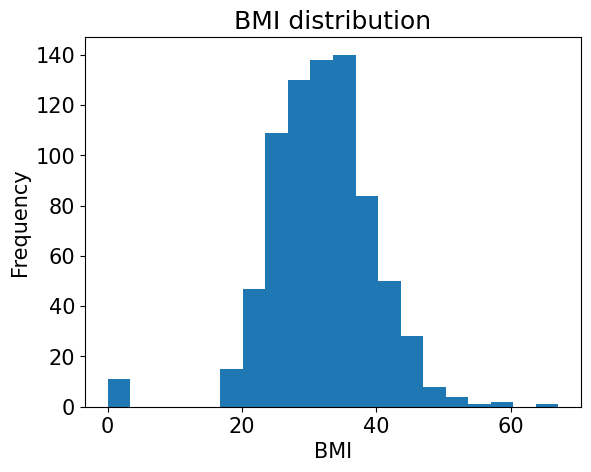

In [16]:
#=================================================-
#### Slide 21/32: Univariate plots: histogram (cont'd)  ####

plt.hist(df_subset['BMI'], bins = 20)
plt.xlabel('BMI')       #<- label x-axis
plt.ylabel('Frequency')      #<- label y-axis
plt.title('BMI distribution')      #<- add plot title
plt.show()




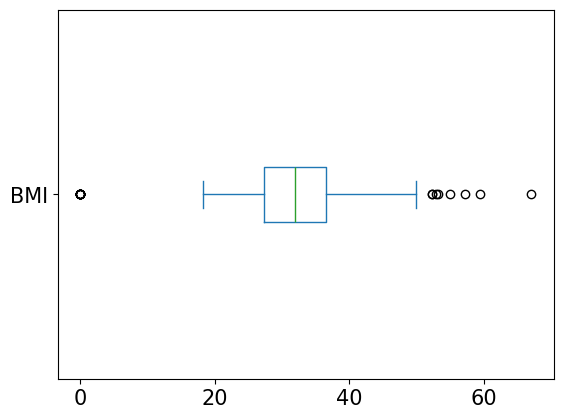

In [17]:
df_subset['BMI'].plot.box(vert=False);

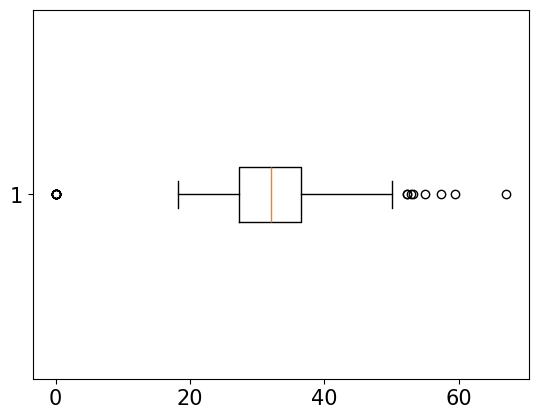

In [18]:
#=================================================-
#### Slide 22/32: Univariate plots: boxplot  ####

plt.boxplot(df_subset['BMI'], vert=False)
plt.show()




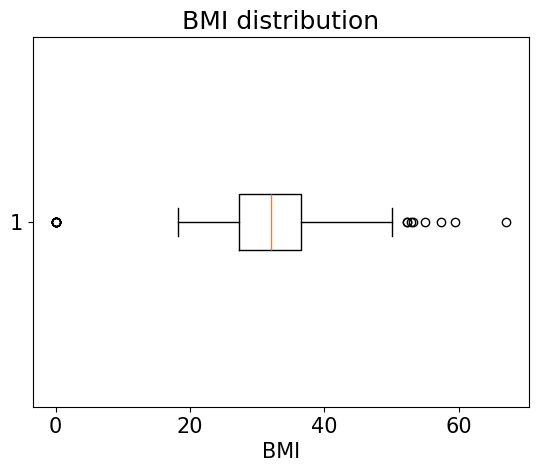

In [19]:
#=================================================-
#### Slide 23/32: Univariate plots: boxplot (cont'd)  ####

plt.boxplot(df_subset['BMI'], vert = False)
plt.xlabel('BMI')       # label x-axis
plt.title('BMI distribution')      # add plot title
plt.show()




In [20]:
#=================================================-
#### Slide 25/32: Univariate plots: bar chart - cont'd  ####

df_grouped_mean_long.head()




,Outcome,metric,mean
0,0,BMI,30.304200
1,1,BMI,35.142537
2,0,SkinThickness,19.664000
3,1,SkinThickness,22.164179
4,0,BloodPressure,68.184000


In [21]:
#=================================================-
#### Slide 26/32: Univariate plots: bar chart - cont'd

df_true_means = df_grouped_mean_long[[
    'Outcome',
    'metric',
    'mean',
]].query("Outcome == 0")
df_true_means

,Outcome,metric,mean
0,0,BMI,30.304200
2,0,SkinThickness,19.664000
4,0,BloodPressure,68.184000
6,0,Age,31.190000
8,0,Glucose,109.980000
10,0,Insulin,68.792000
12,0,DiabetesPedigreeFunction,0.429734


In [22]:
mask = df_grouped_mean_long["Outcome"].eq(0)

df_true_means = df_grouped_mean_long[[
    'metric',
    'mean',
]][mask]
df_true_means

,metric,mean
0,BMI,30.304200
2,SkinThickness,19.664000
4,BloodPressure,68.184000
6,Age,31.190000
8,Glucose,109.980000
10,Insulin,68.792000
12,DiabetesPedigreeFunction,0.429734


In [23]:
#=================================================-
#### Slide 26/32: Univariate plots: bar chart - cont'd

df_true_means = df_grouped_mean_long[[
    'metric',
    'mean',
]][df_grouped_mean_long["Outcome"].eq(0)]
df_true_means

,metric,mean
0,BMI,30.304200
2,SkinThickness,19.664000
4,BloodPressure,68.184000
6,Age,31.190000
8,Glucose,109.980000
10,Insulin,68.792000
12,DiabetesPedigreeFunction,0.429734


In [24]:
df_true_means = df_true_means.sort_values("mean")

In [25]:
#=================================================-
#### Slide 27/32: Univariate plots: bar chart - cont'd  ####

bar_labels = df_true_means['metric']     #<- 1
bar_heights = df_true_means['mean']      #<- 2
num_bars = len(bar_heights)
bar_positions = np.arange(num_bars)      #<- 3




In [26]:
plt.rcParams.update({'font.size': 25})

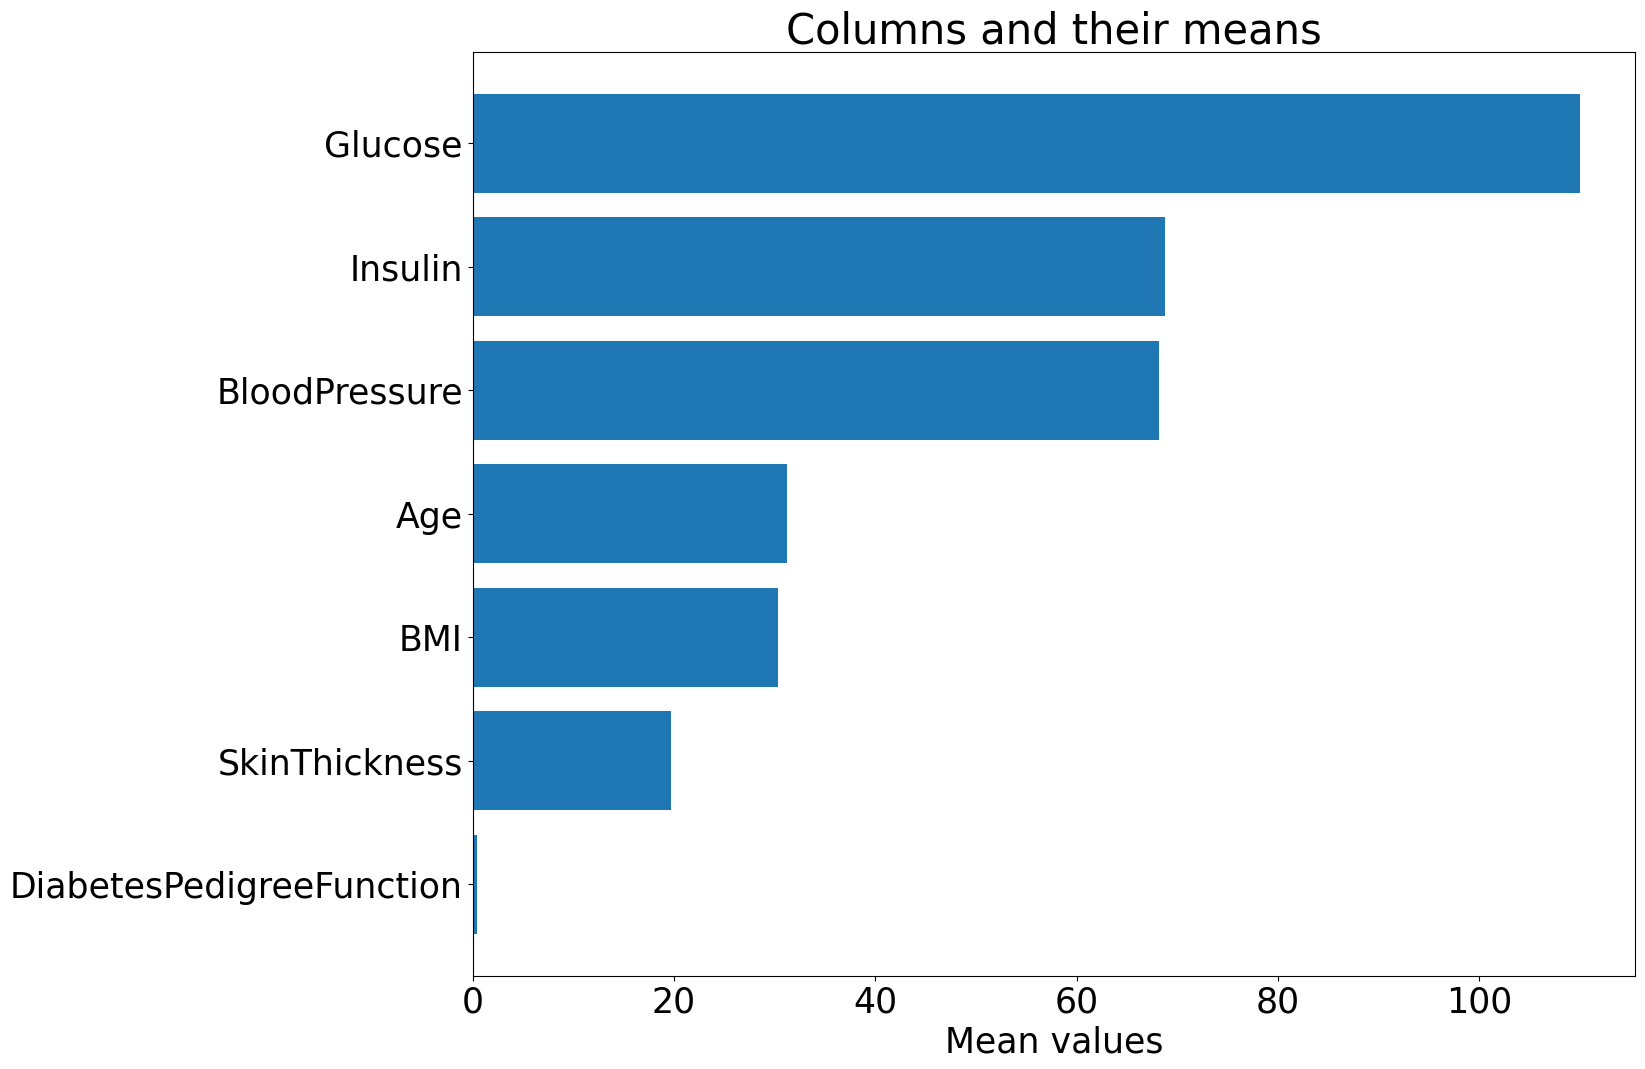

In [27]:
#=================================================-
#### Slide 28/32: Univariate plots: bar chart - cont'd  ####

# Adjust figure size before plotting.
plt.figure(figsize=(15, 12)) 
plt.barh(bar_positions, bar_heights)
plt.yticks(bar_positions, bar_labels)
plt.xlabel('Mean values')
plt.title('Columns and their means');

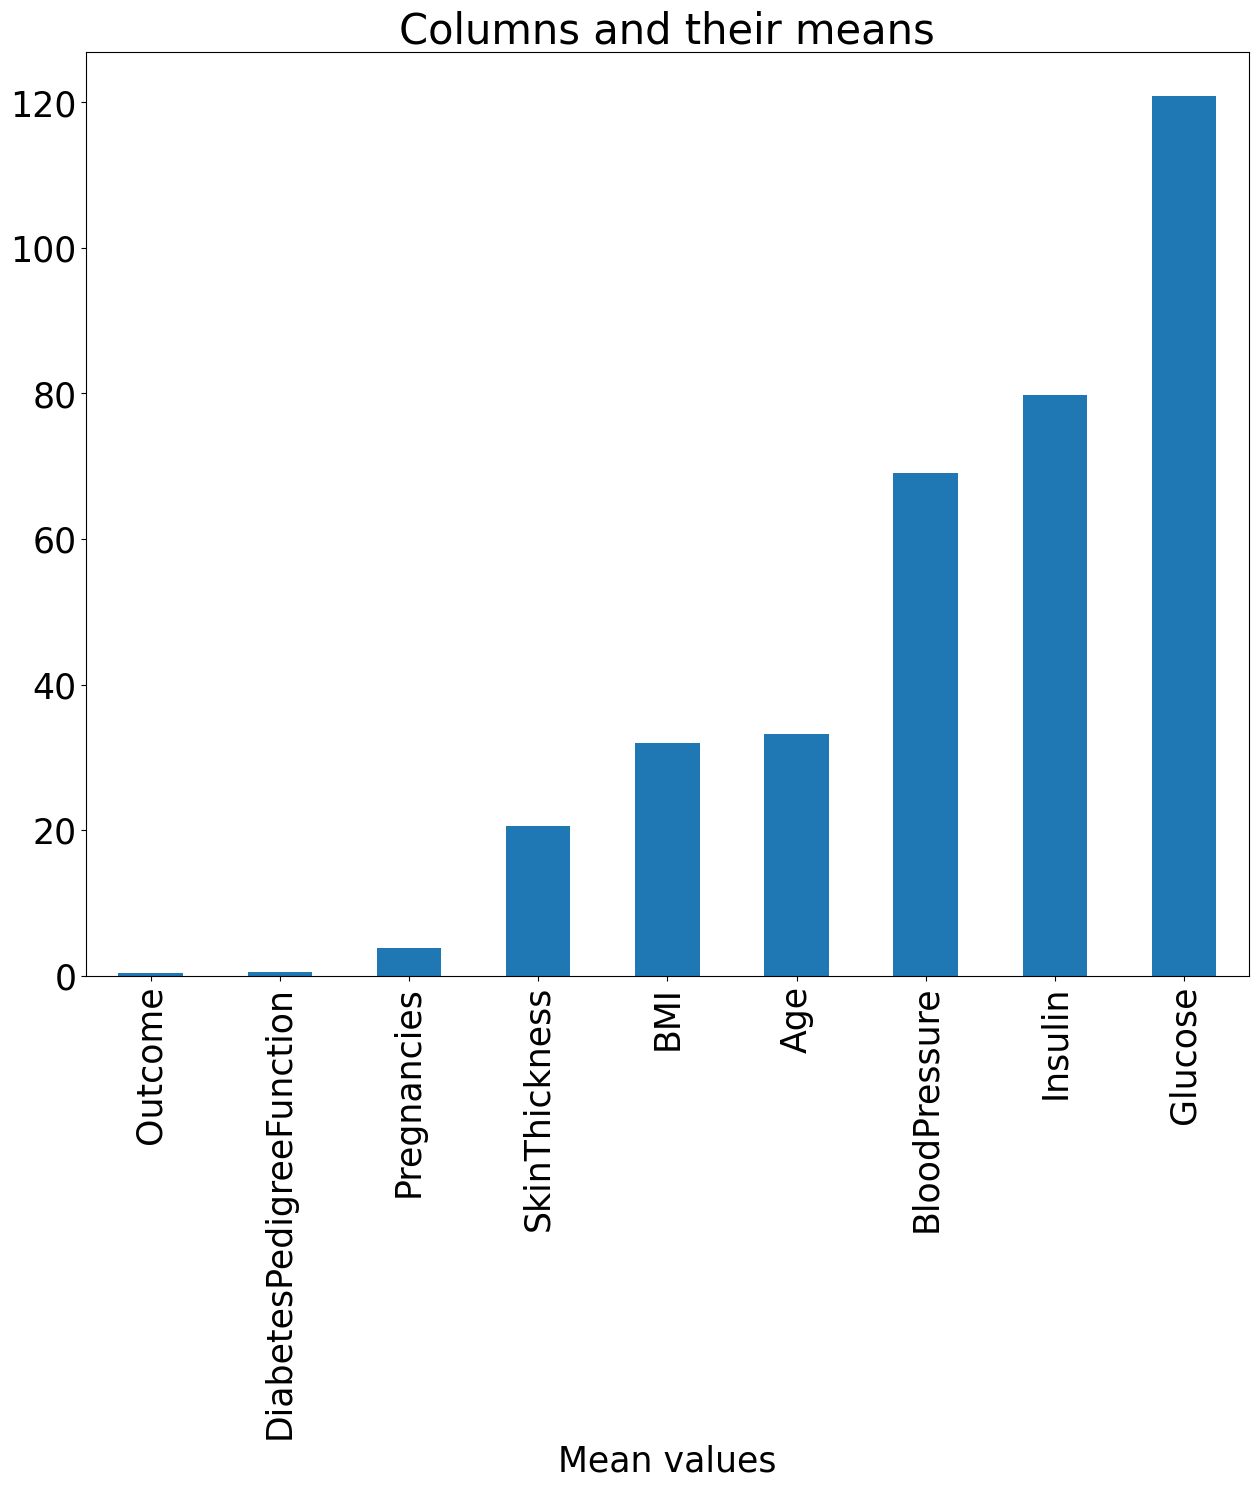

In [28]:
df_subset.mean().sort_values().plot.bar(figsize=(15, 12))
plt.xlabel('Mean values')
plt.title('Columns and their means');

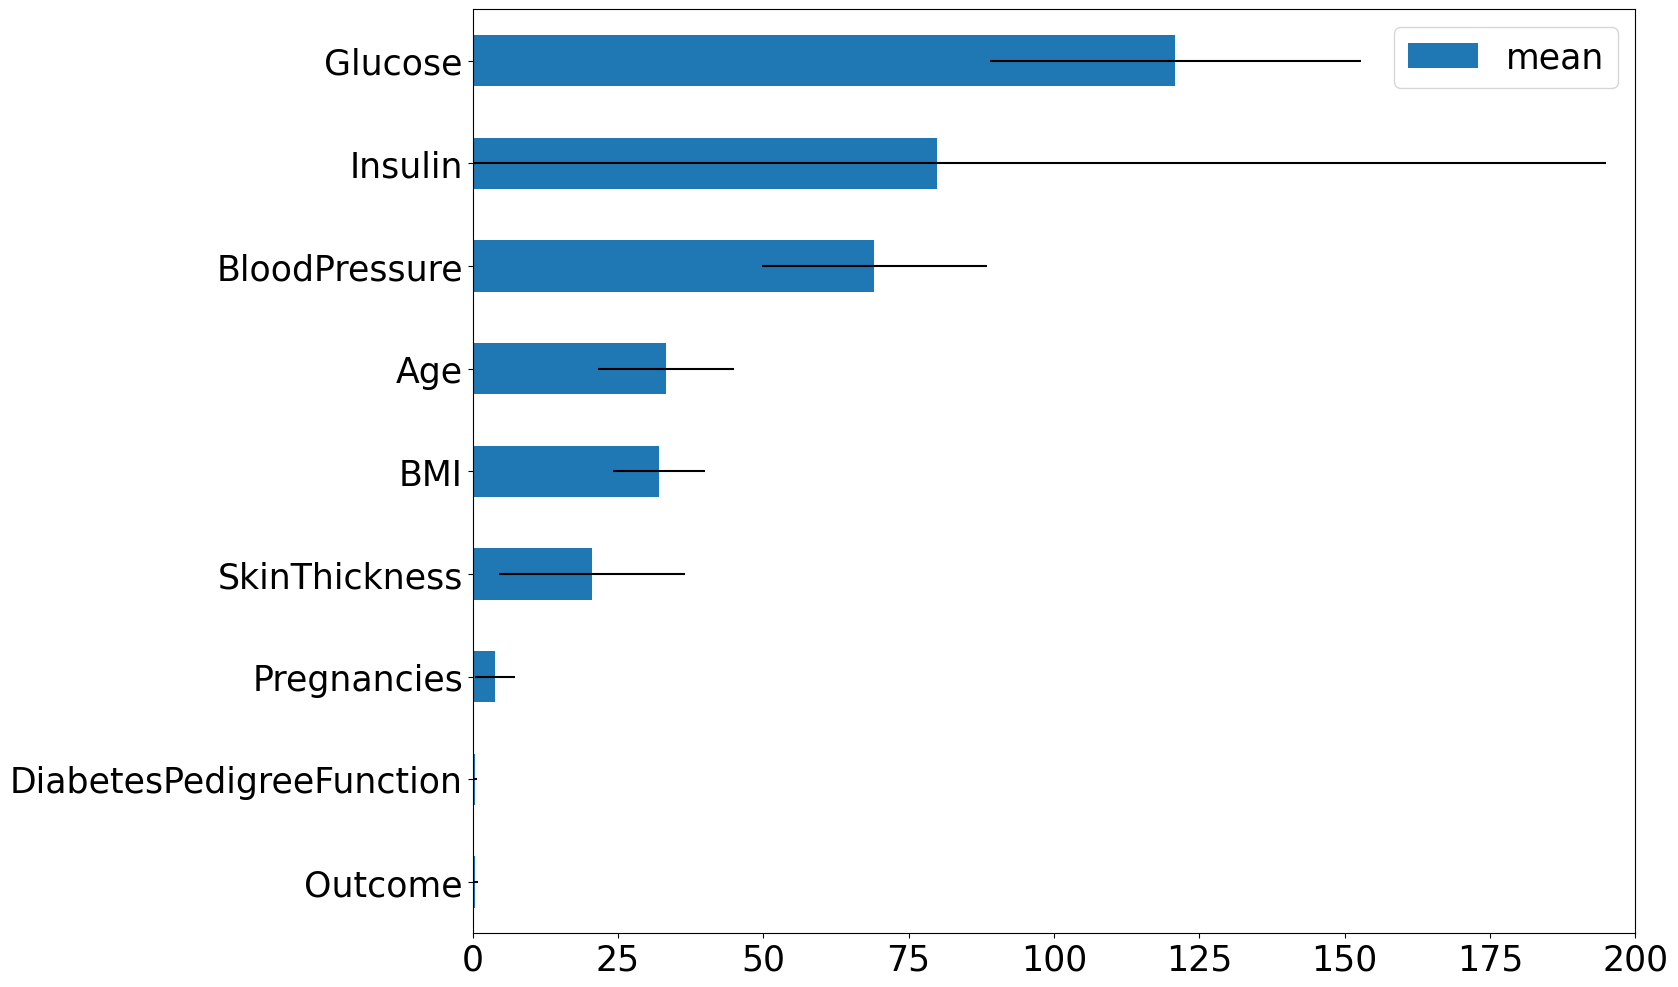

In [29]:
df_subset.agg([
    "mean",
    "std"]).T.sort_values("mean").plot.barh(
    y="mean",
    xerr="std",
    xlim=(0, 200),
    figsize=(15, 12),
);

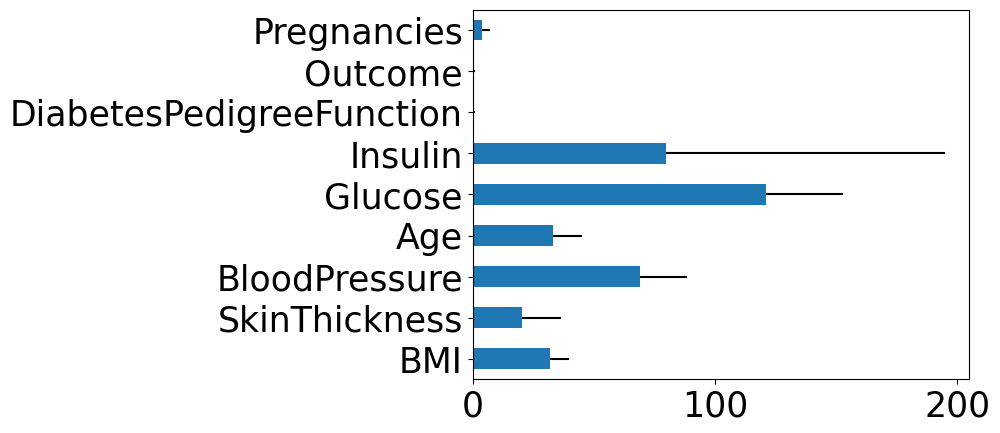

In [30]:
means, stds = df_subset.mean(), df_subset.std()
means.plot.barh(xerr=[[0]*len(stds), stds]);

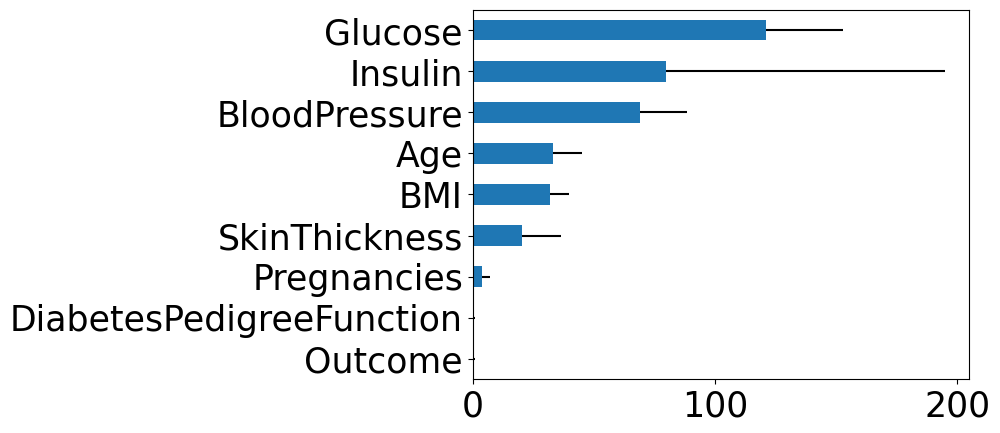

In [31]:
means = df_subset.mean().sort_values()
stds = df_subset.std()[means.index]
means.plot.barh(xerr=[[0]*len(stds), stds]);

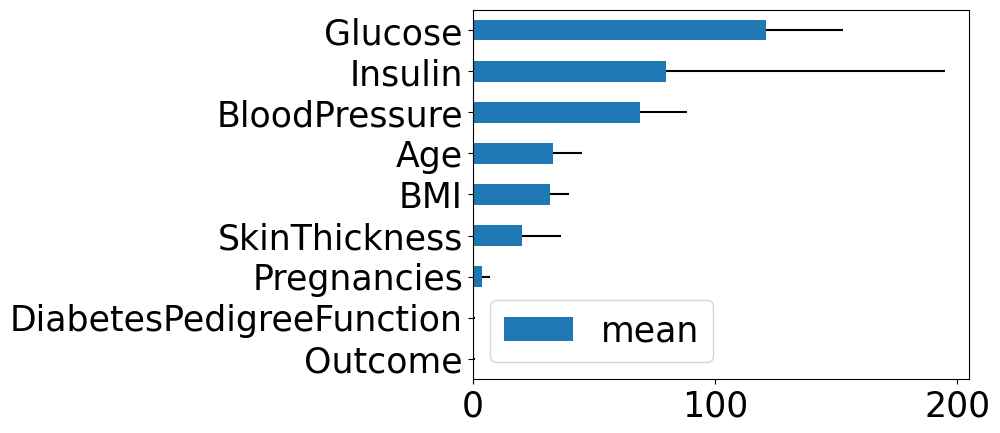

In [32]:
plot_df = df_subset.agg([
    "mean",
    "std",
]).T.sort_values("mean")
plot_df.plot.barh(
    y="mean",
    xerr=([0]*len(plot_df), plot_df["std"]),
);

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
curr_dir = Path.cwd()
main_dir = curr_dir.parent
data_dir = main_dir / "data"
plot_dir = main_dir / "plots"
data_dir.mkdir(exist_ok=True)
plot_dir.mkdir(exist_ok=True)
df = pd.read_csv(data_dir / "diabetes.csv")

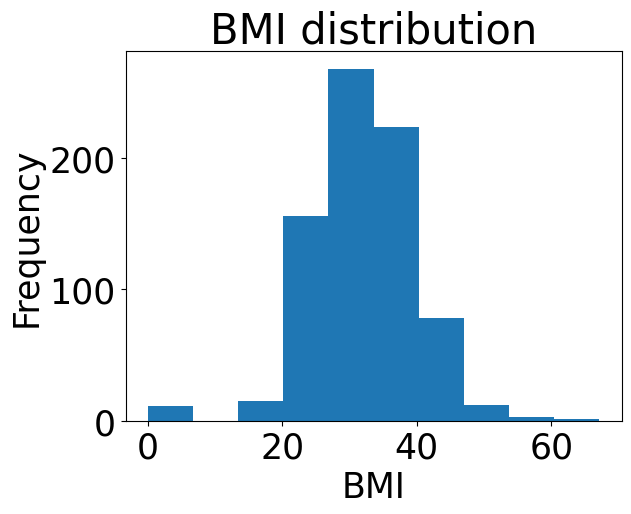

In [34]:
df['BMI'].hist(grid=False)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI distribution');

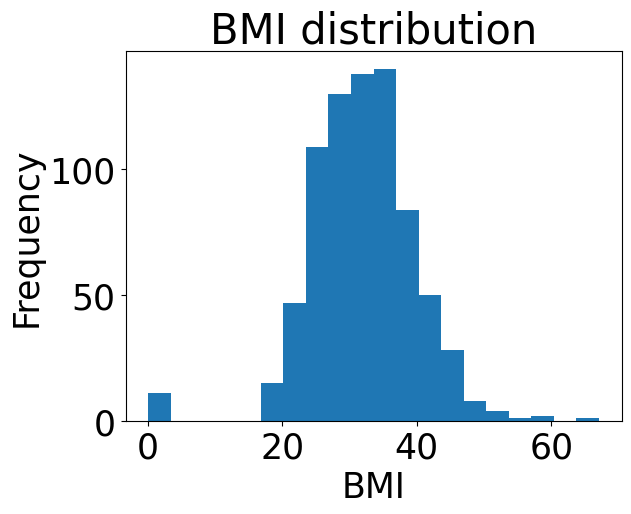

In [35]:
plt.hist(df['BMI'], bins = 20)
plt.xlabel('BMI')       #<- label x-axis
plt.ylabel('Frequency')      #<- label y-axis
plt.title('BMI distribution');      #<- add plot title

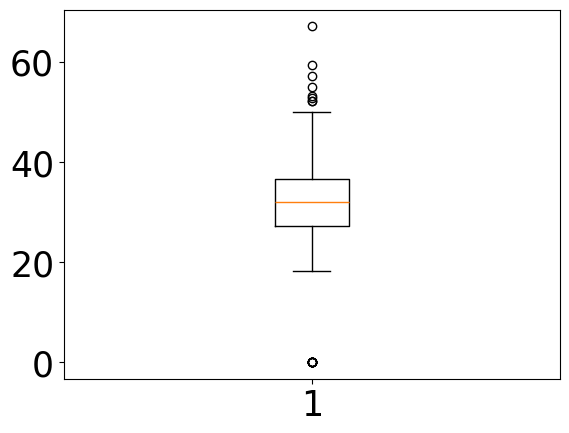

In [36]:
plt.boxplot(df['BMI']);

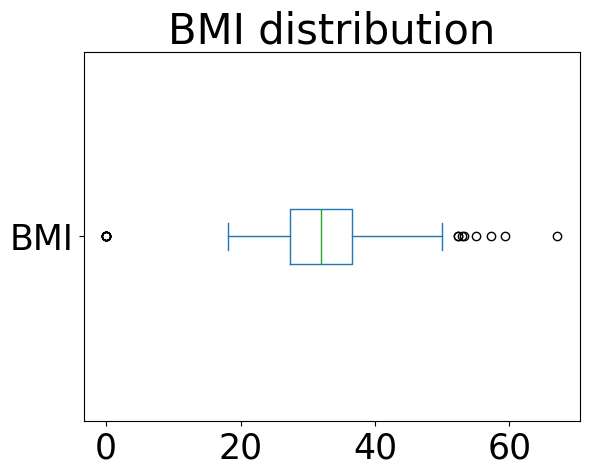

In [37]:
df['BMI'].plot.box(vert=False)
plt.title('BMI distribution');

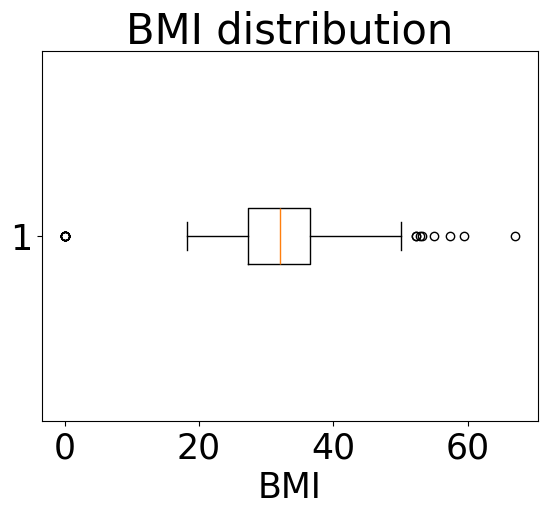

In [38]:
plt.boxplot(df['BMI'], vert=False)
plt.xlabel('BMI')       # label x-axis
plt.title('BMI distribution');      # add plot title

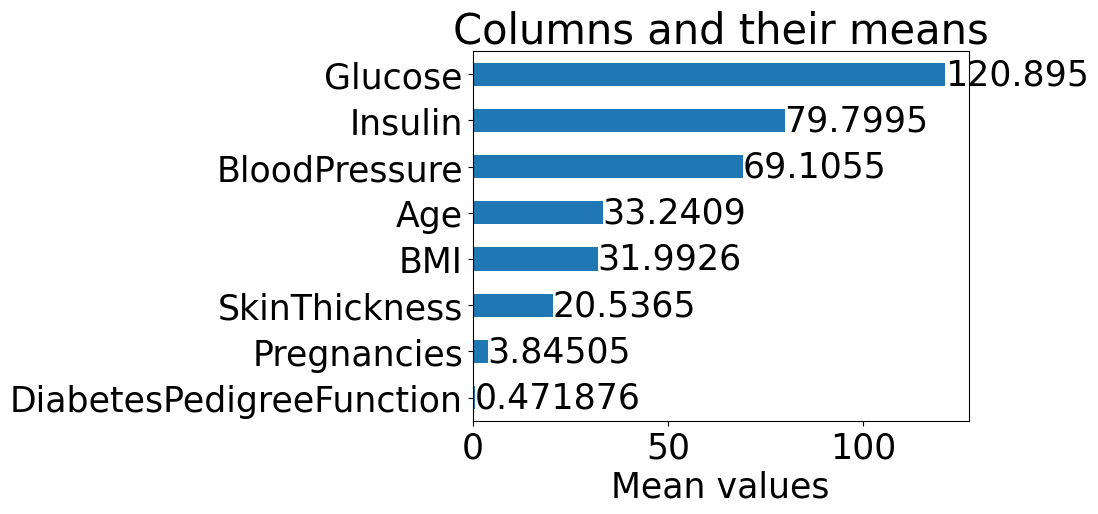

In [39]:
ax = df.drop(["Outcome", "id"], axis=1).mean().sort_values().plot.barh(title="Columns and their means", xlabel="Mean values")
for i in ax.containers: ax.bar_label(i)

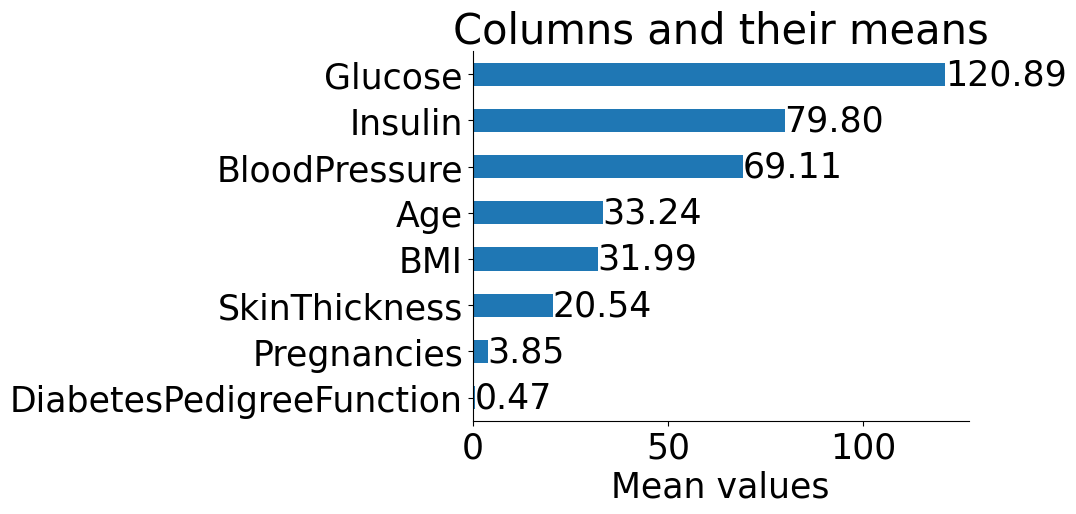

In [40]:
ax = df.drop(["Outcome", "id"], axis=1).mean().sort_values().plot.barh(title="Columns and their means", xlabel="Mean values")
for i in ax.containers: ax.bar_label(i, fmt="%.2f")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

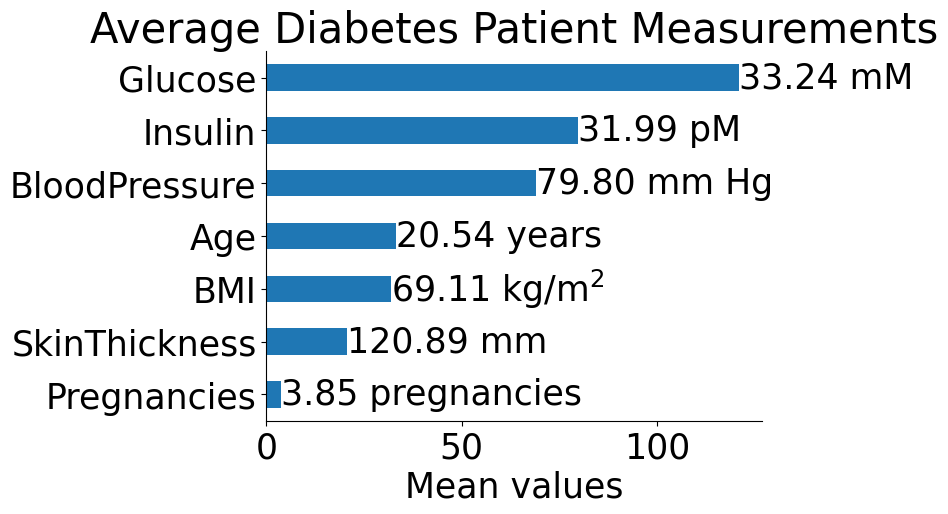

In [41]:
means = df.drop(["Outcome", "id", "DiabetesPedigreeFunction"], axis=1).mean()
units = [" pregnancies", " mm", r" kg/m$^2$", " years", " mm Hg", " pM", " mM"]
labs = [f"{v:.2f}" + u for v, u in zip(means, units)]
ax = means.sort_values().plot.barh(title="Average Diabetes Patient Measurements", xlabel="Mean values")
for i in ax.containers: ax.bar_label(i, labels=labs)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [42]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [43]:
plt.rcParams.update({'font.size': 15})

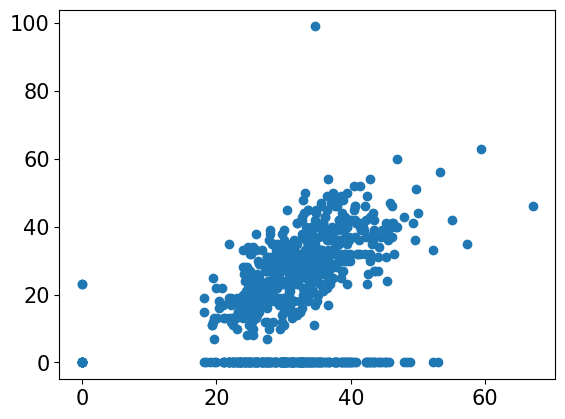

In [44]:
#=================================================-
#### Slide 13/32: Bivariate plots: scatterplot  ####

plt.scatter(
    df_subset['BMI'],
    df_subset['SkinThickness'],
);

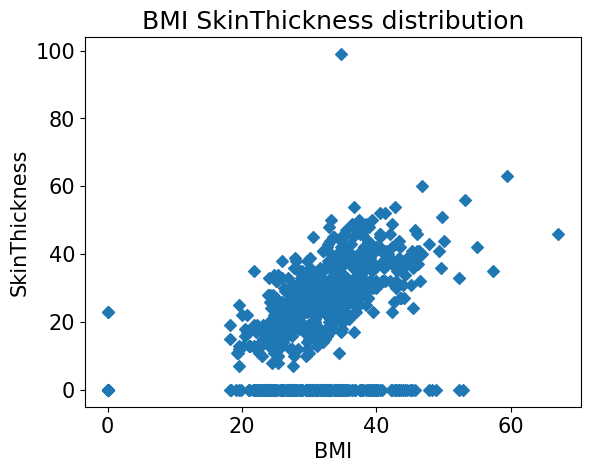

In [45]:
#=================================================-
#### Slide 14/32: Bivariate plots: scatterplot - cont'd  ####

plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            marker = "D") #<- set marker type to diamond
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

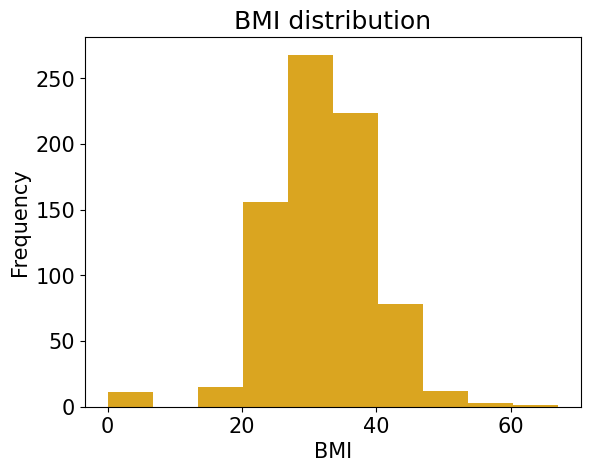

In [46]:
#=================================================-
#### Slide 17/32: Customize colors - cont'd  ####

plt.hist(df_subset['BMI'], color='goldenrod')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI distribution');

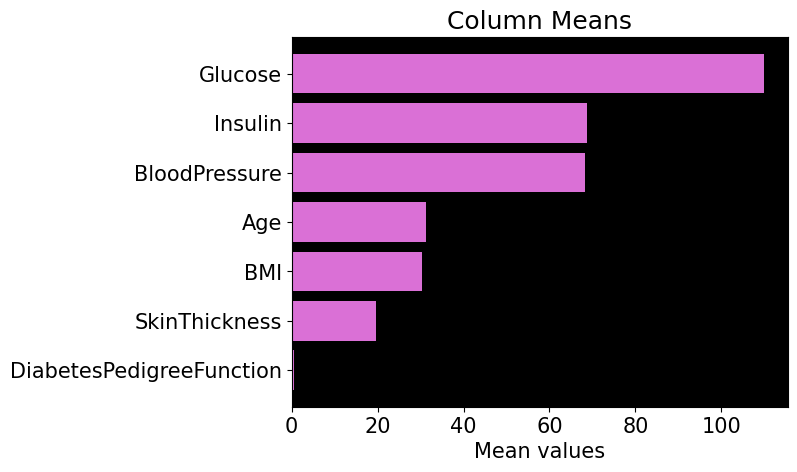

In [47]:
#=================================================-
#### Slide 18/32: Customize colors - cont'd  ####
ax = plt.axes()
plt.barh(bar_positions, bar_heights, facecolor="orchid")
plt.yticks(bar_positions, bar_labels)
plt.xlabel('Mean values')
plt.title('Column Means')  
ax.set_facecolor("k")

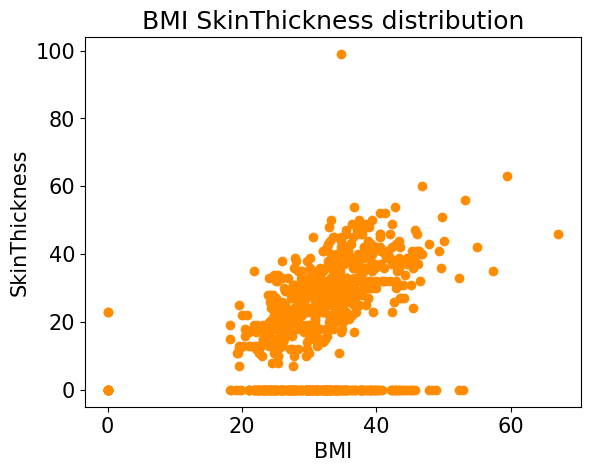

In [48]:
#=================================================-
#### Slide 19/32: Customize color: scatterplot  ####

plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            facecolor = 'darkorange') #<- set marker type to diamond
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

In [49]:
df_subset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0    palevioletred
1     darkseagreen
2    palevioletred
3     darkseagreen
4    palevioletred
Name: Outcome, dtype: object


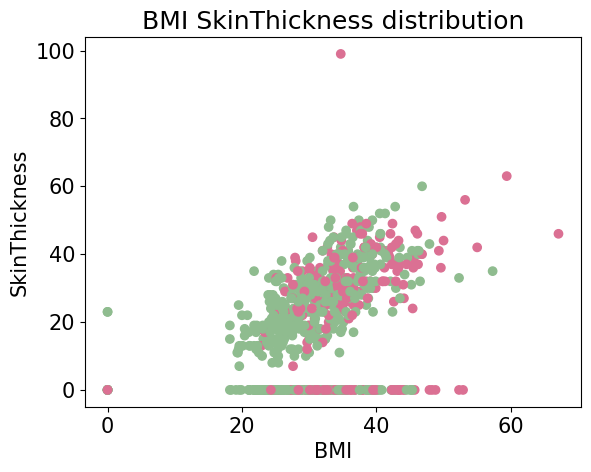

In [50]:
#=================================================-
#### Slide 21/32: Customize color: map colors - cont'd  ####

color_dict = {0: 'darkseagreen', 1: 'palevioletred'}
color = df_subset['Outcome'].map(color_dict)
print(color.head())
plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

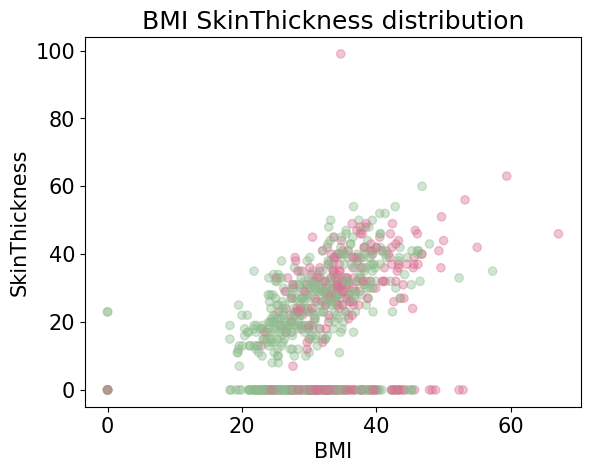

In [51]:
#=================================================-
#### Slide 23/32: Customize color: opacity  ####

plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color,
            alpha = 0.4)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

In [52]:
#=================================================-
#### Slide 24/32: Customize plot settings: available styles  ####

print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


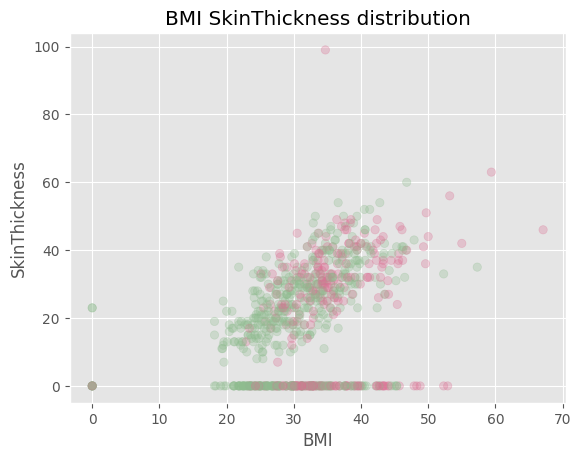

In [53]:
#=================================================-
#### Slide 25/32: Customize plot settings: test ggplot style  ####

plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color,
            alpha = 0.3)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

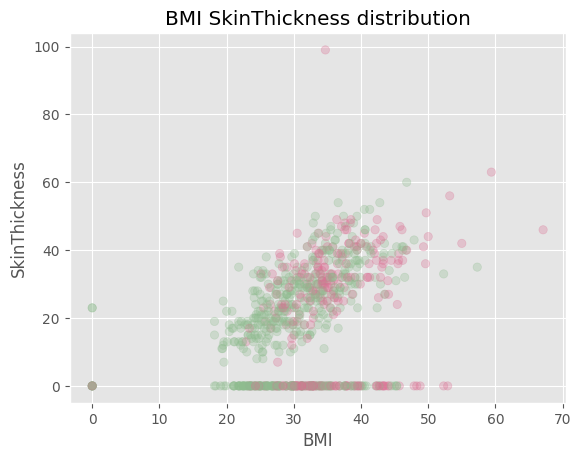

In [54]:
#=================================================-
#### Slide 25/32: Customize plot settings: test ggplot style  ####

plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color,
            alpha = 0.3)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

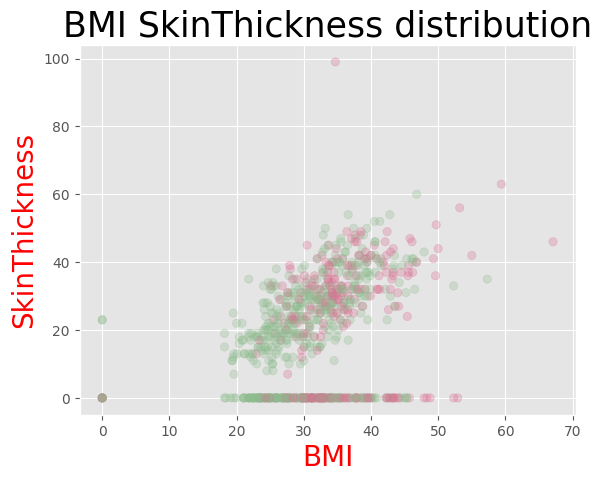

In [55]:
#=================================================  -
#### Slide 27/32: Customize plot settings: labels  ####

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['axes.titlesize'] = 25
plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color,
            alpha = 0.3)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');

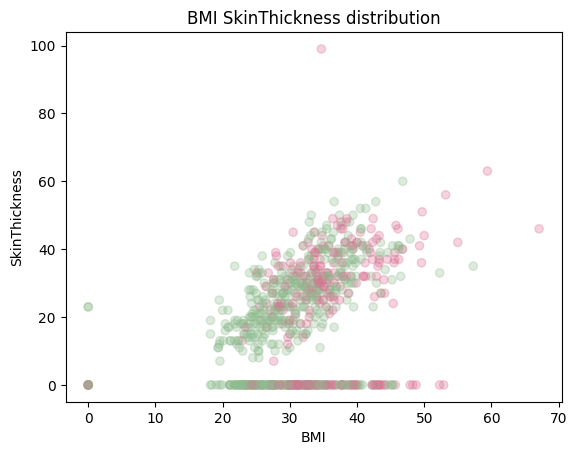

In [56]:
#================================================= -
#### Slide 28/32: Customize plot settings: reset defaults  ####

plt.rcdefaults()
plt.scatter(df_subset['BMI'],
            df_subset['SkinThickness'],
            c = color,
            alpha = 0.3)
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.title('BMI SkinThickness distribution');


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [57]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [58]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,id
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,764
764,2,122,70,27,0,36.8,0.340,27,0,765
765,5,121,72,23,112,26.2,0.245,30,0,766
766,1,126,60,0,0,30.1,0.349,47,1,767


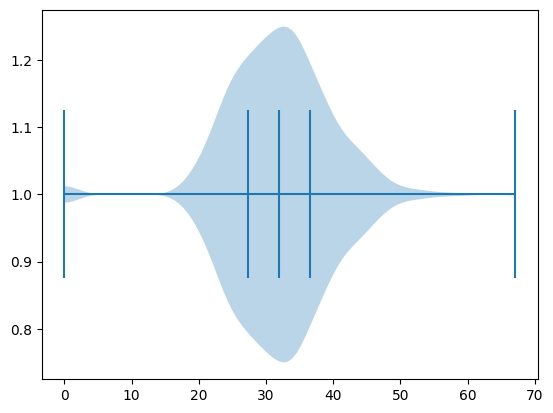

In [59]:
#=================================================-
#### Slide 4/30: Complex univariate plots: violin plots

plt.violinplot(
    df_subset['BMI'],
    vert=False,
    quantiles=[.25, .75],
    showmedians=True,
);

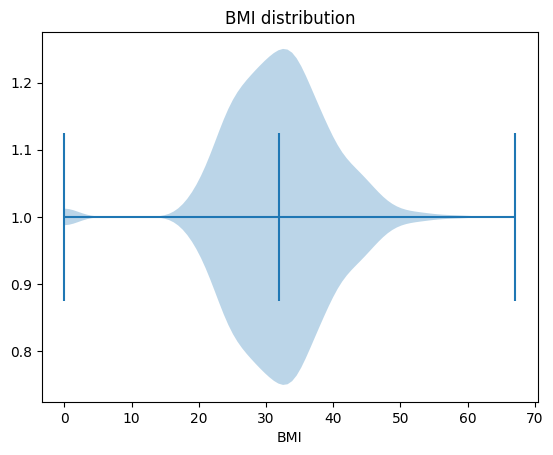

In [60]:
#=================================================-
#### Slide 6/30: Univariate plots: violin plot (cont'd)  ####

plt.violinplot(df_subset['BMI'], vert = False, showmeans=False, showmedians=True)
plt.xlabel('BMI')
plt.title('BMI distribution');

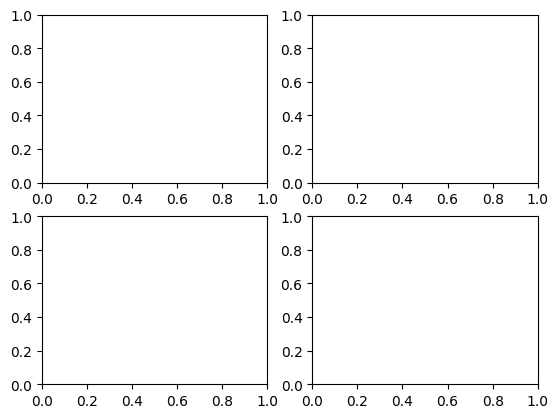

In [61]:
#=================================================-
#### Slide 8/30: Compound visualizations: grids  ####

# Create a 2 x 2 figure and axes grid.
fig, axes = plt.subplots(2, 2) 

In [62]:
#=================================================-
#### Slide 9/30: Compound visualizations: axes  ####

print(axes)




[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


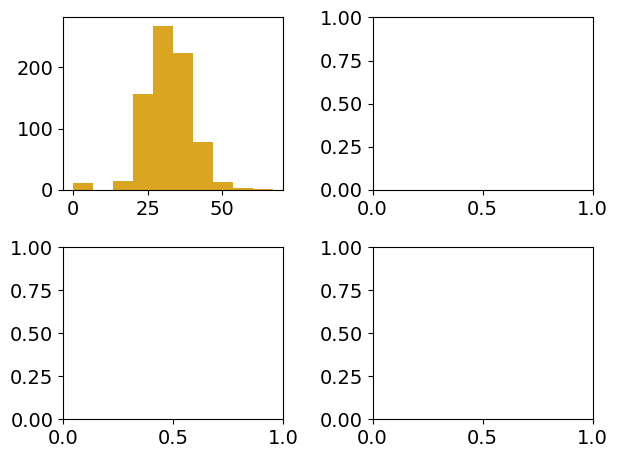

In [63]:
#=================================================-
#### Slide 10/30: Compound visualizations: axes (cont'd)

plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 2) 
axes[0, 0].hist(df_subset['BMI'], facecolor='goldenrod')
plt.tight_layout()

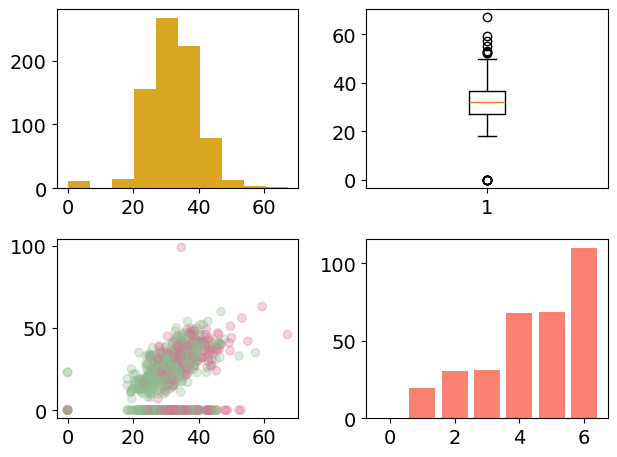

In [64]:
#=================================================-
#### Slide 11/30: Compound visualizations: axes (cont'd)  ####

fig, axes = plt.subplots(2, 2)
color_dict = {0: 'darkseagreen', 1: 'palevioletred'}
color = df_subset['Outcome'].map(color_dict)
axes[0, 0].hist(df_subset['BMI'], color='goldenrod')
axes[0, 1].boxplot(df_subset['BMI']) 
axes[1, 0].scatter(df_subset['BMI'],
                   df_subset['SkinThickness'],
                   c=color,
                   alpha=0.3)
axes[1, 1].bar(bar_positions, bar_heights,
               color="salmon")
plt.tight_layout()

In [65]:
#=================================================-
#### Slide 12/30: Compound visualizations: labeling axes  ####

# Histogram.
axes[0, 0].set_ylabel('BMI distribution')
axes[0, 0].set_xlabel('BMI')

# Boxplot.
axes[0, 1].set_ylabel('BMI')

# Scatterplot.
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('SkinThickness')

# Mean values of categories of variable means.
axes[1, 1].set_ylabel('Mean values')

Text(313.9444444444444, 0.5, 'Mean values')

In [66]:
#=================================================-
#### Slide 13/30: Compound visualizations: labeling ticks   ####

# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])
# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels,rotation = 18)

[Text(0, 0, 'DiabetesPedigreeFunction'),
 Text(1, 0, 'SkinThickness'),
 Text(2, 0, 'BMI'),
 Text(3, 0, 'Age'),
 Text(4, 0, 'BloodPressure'),
 Text(5, 0, 'Insulin'),
 Text(6, 0, 'Glucose')]

In [67]:
#=================================================-
#### Slide 14/30: Compound visualizations: figure adjustments  ####

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.titlesize'] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle('Data Summary')

Text(0.5, 0.98, 'Data Summary')

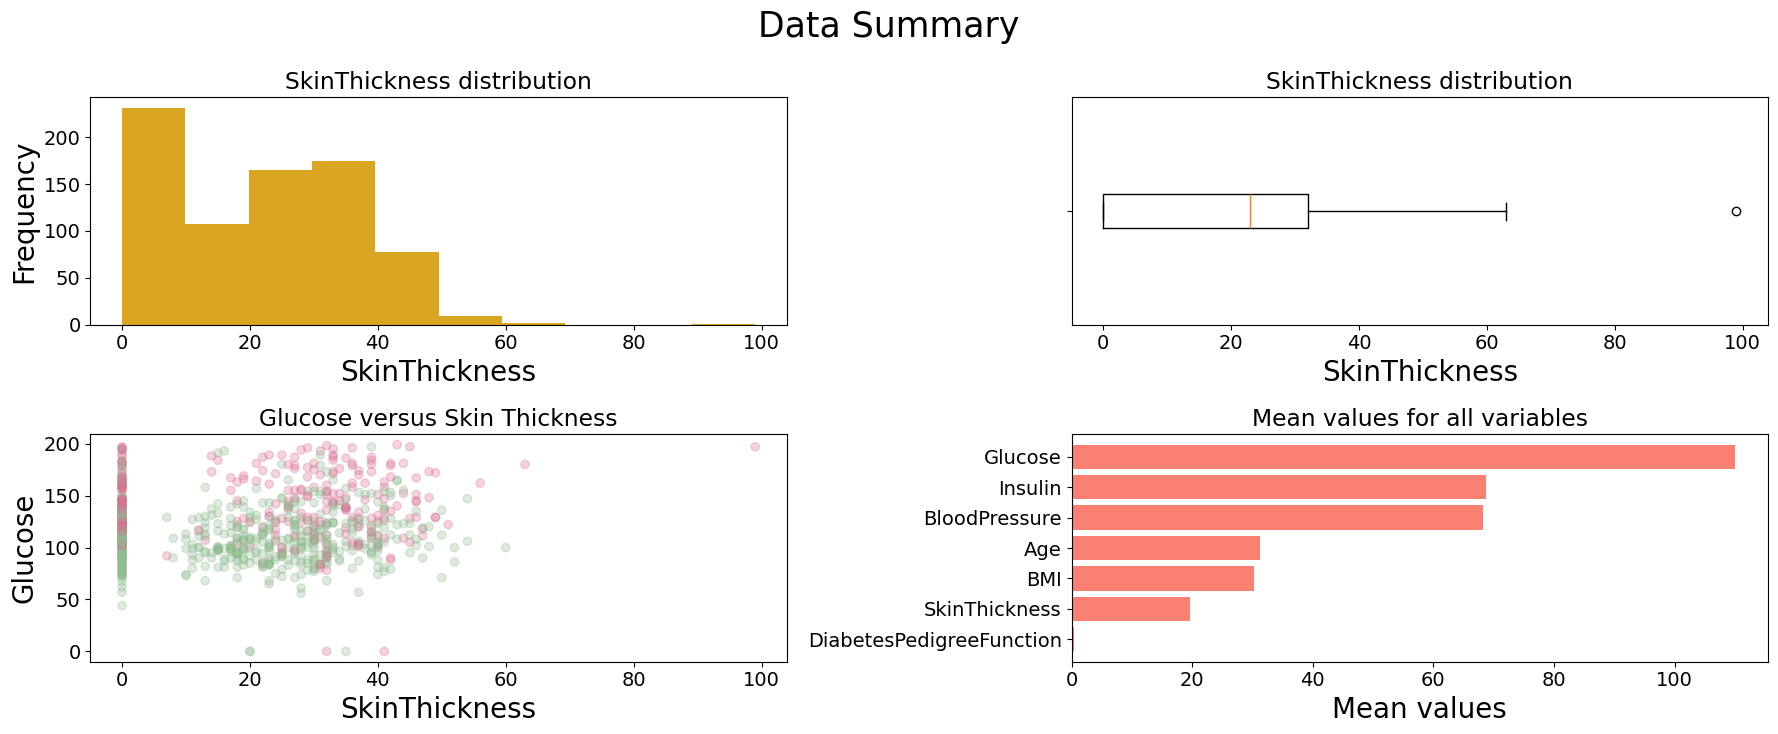

In [68]:
fig, axes = plt.subplots(2, 2) 

color = df_subset['Outcome'].map({
    0: 'darkseagreen',
    1: 'palevioletred',
})
axes[0, 0].hist(df_subset['SkinThickness'],
                color = 'goldenrod')
axes[0, 1].boxplot(df_subset['SkinThickness'],
                  vert=False) 
axes[1, 0].scatter(df_subset['SkinThickness'],
                   df_subset['Glucose'],
                   c = color,
                   alpha = 0.3)
axes[1, 1].barh(bar_positions, bar_heights,
               color = "salmon")
               
# Histogram.
axes[0, 0].set_title('SkinThickness distribution')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlabel('SkinThickness')

# Boxplot.
axes[0, 1].set_title('SkinThickness distribution')
axes[0, 1].set_xlabel('SkinThickness')

# Scatterplot.
axes[1, 0].set_xlabel('SkinThickness')
axes[1, 0].set_ylabel('Glucose')
axes[1, 0].set_title('Glucose versus Skin Thickness')

# Mean values of categories of variable means.
axes[1, 1].set_xlabel('Mean values')  
axes[1, 1].set_title('Mean values for all variables')  

# No labels for ticks for boxplot.
axes[0, 1].yaxis.set_ticklabels([""])

# Tick positions set to bar positions in bar chart.
axes[1, 1].yaxis.set_ticks(bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].yaxis.set_ticklabels(bar_labels)

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.titlesize'] = 25
fig.set_size_inches(18, 7.5)
fig.suptitle('Data Summary')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

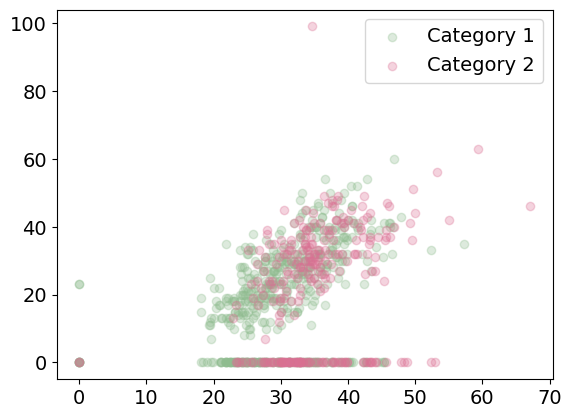

In [69]:
#=================================================-
#### Slide 18/30: Compound visualizations: layered plots (cont'd)  ####

plt.clf()                  #<- clear plotting area
fig, axes = plt.subplots() #<- create a new figure and axes objects for plotting

grouping_col_levels = list(df_grouped_mean_long[grouping_col].unique())
grouping_category_1 = grouping_col_levels[0]
grouping_category_2 = grouping_col_levels[1]

for key, value in color_dict.items():
    query = str('Outcome') + '==' + str(key)
    sc_col_1 = df_subset.query(query)['BMI']
    sc_col_2 = df_subset.query(query)['SkinThickness']

    if key == int(grouping_category_1):
        Flag = "Category 1"
    else:
        Flag = "Category 2"

    axes.scatter(sc_col_1, 
                 sc_col_2, 
                 c = value, 
                 label = Flag,
                 alpha = 0.3)
axes.legend();  #<- add a legend that would automatically get labels and colors from layers!   

In [70]:
#=================================================-
#### Slide 20/30: Compound visualizations: layered plots (cont'd)  ####

# We already have `'Outcome'` = `'0'` mean data.
print(df_true_means.head())
# Let's get the `'Outcome'` = `'1'` mean data.
query = str('Outcome') + '==' + str('1')
df_false_means = df_grouped_mean_long.query(query)[['metric','mean']]
print(df_false_means)

                      metric       mean
12  DiabetesPedigreeFunction   0.429734
2              SkinThickness  19.664000
0                        BMI  30.304200
6                        Age  31.190000
4              BloodPressure  68.184000
                      metric        mean
1                        BMI   35.142537
3              SkinThickness   22.164179
5              BloodPressure   70.824627
7                        Age   37.067164
9                    Glucose  141.257463
11                   Insulin  100.335821
13  DiabetesPedigreeFunction    0.550500


In [71]:
#=================================================-
#### Slide 21/30: Compound visualizations: layered plots (cont'd)  ####

# Mean values for `'Outcome'` = `'0'` data.
category_1_bar_heights = df_true_means['mean'] 
# Mean values for `'Outcome'` = `'1'` data.
category_2_bar_heights = df_false_means['mean']  
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = df_false_means['metric'] 
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)       
width = 0.35

<Figure size 640x480 with 0 Axes>

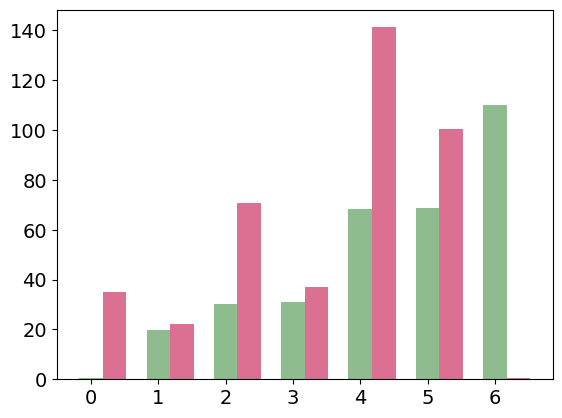

In [72]:
#=================================================-
#### Slide 22/30: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()
category_1_bar_chart = axes.bar(bar_positions,          #<- set bar positions
                            category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = color_dict[0]) #<- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.bar(bar_positions + width, #<- set bar positions 
                          category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = color_dict[1]); #<- set color corresponding to '1' in dictionary

In [73]:
#=================================================-
#### Slide 23/30: Compound visualizations: layered plots (cont'd)  ####

# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Data metrics summary')
axes.set_xticks(bar_positions + width/2)
axes.set_xticklabels(bar_labels);

<Figure size 640x480 with 0 Axes>

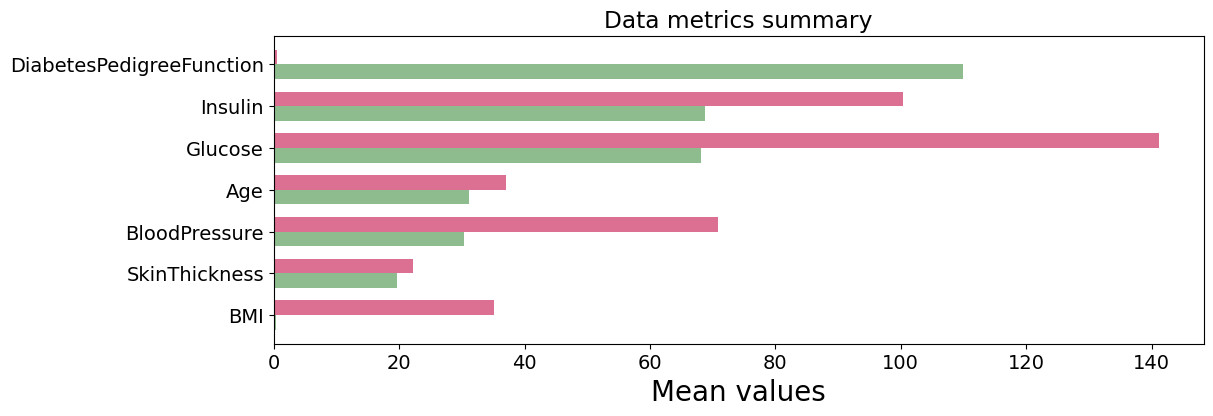

In [74]:
#=================================================-
#### Slide 24/30: Compound visualizations: layered plots (cont'd)  ####

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

category_1_bar_chart = axes.barh(bar_positions,          #<- set bar positions
                            category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = color_dict[0]) #<- set color corresponding to '0' in dictionary
category_2_bar_chart = axes.barh(bar_positions + width, #<- set bar positions 
                          category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = color_dict[1]) #<- set color corresponding to '1' in dictionary

# Add text for labels, title and axes ticks.
axes.set_xlabel('Mean values')
axes.set_title('Data metrics summary')
axes.set_yticks(bar_positions + width/2)
axes.set_yticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
fig.set_size_inches(12, 4);

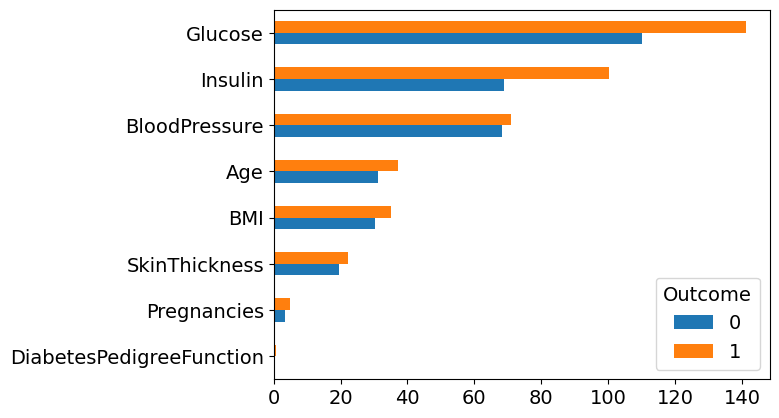

In [75]:
df_subset.groupby("Outcome").mean().T.sort_values(0).plot.barh();

In [76]:
#=================================================-
#### Slide 28/30: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
